In [140]:
!ls

RandomForest.ipynb    test_hot_X_y.csv      train_one_hot_50.csv
nuMoM2bsubset.csv     train_df.csv          tree.dot
test_df.csv           train_one_hot_100.csv tree.png


In [3]:
import pandas as pd

In [20]:
import seaborn as sns

In [167]:
df = pd.read_csv("train_df.csv", index_col=0)

In [169]:
df["worrysymptoms"].unique()

array([ 8, 10, 12, 15,  6,  7,  9, 14, 11, 13, 16, 18,  5, 17])

In [146]:
test_df = pd.read_csv("test_hot_X_y.csv", index_col=0)

In [150]:
df["dv.hypertension"].value_counts()

yes    5371
no     5371
Name: dv.hypertension, dtype: int64

In [152]:
test_df["dv.hypertension"].value_counts()

no     2309
yes      71
Name: dv.hypertension, dtype: int64

In [144]:
df.dtypes

age                  float64
race.black           float64
race.hispanic        float64
race.native          float64
race.other           float64
                      ...   
discrimination.11      int64
bornearly.1          float64
bornearly.2          float64
bornearly.3          float64
dv.hypertension       object
Length: 83, dtype: object

In [55]:
df.bornearly.describe()

count    5554.000000
mean        2.795823
std         0.527040
min         1.000000
25%         3.000000
50%         3.000000
75%         3.000000
max         3.000000
Name: bornearly, dtype: float64

In [56]:
df.bornearly.value_counts()

3    4740
2     494
1     320
Name: bornearly, dtype: int64

In [10]:
df["dv.hypertension1"]

1       False
2       False
4       False
6       False
7        True
        ...  
7927    False
7929    False
7930    False
7931    False
7934    False
Name: dv.hypertension1, Length: 5554, dtype: bool

In [19]:
df.describe()

,age,psstotal,anxtotal,worryfambaby,systolic,diastolic,worryhealthcare,worrysymptoms,ssqmean,prepreglbs,familypreeclampsia,income,discrimination,bornearly
count,5554.000000,5554.000000,5554.000000,5554.000000,5554.000000,5554.000000,5554.000000,5554.000000,5554.000000,5554.000000,5554.000000,5554.000000,5554.000000,5554.000000
mean,27.113792,29.740547,35.335614,4.699856,109.153403,67.200576,2.691934,9.077602,6.198175,150.768067,2.785920,7.899352,1.625675,2.795823
std,5.858252,3.497655,7.662877,1.239881,10.818338,8.380843,0.968242,2.136506,1.182984,41.710108,0.526697,4.827713,1.173172,0.527040
min,0.000000,0.000000,20.000000,0.000000,66.000000,40.000000,0.000000,5.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000
25%,23.000000,28.000000,30.000000,4.000000,100.000000,60.000000,2.000000,7.000000,6.000000,125.000000,3.000000,4.000000,1.000000,3.000000
50%,28.000000,30.000000,34.000000,5.000000,110.000000,68.000000,2.000000,9.000000,6.583333,140.000000,3.000000,10.000000,1.000000,3.000000
75%,31.000000,32.000000,40.000000,5.000000,118.000000,72.000000,3.000000,10.000000,7.000000,168.000000,3.000000,12.000000,2.000000,3.000000
max,52.000000,50.000000,72.000000,9.000000,160.000000,104.000000,6.000000,18.000000,7.000000,368.000000,3.000000,14.000000,11.000000,3.000000


In [17]:
df[["worryfambaby", "worryhealthcare", "worrysymptoms"]].value_counts()

worryfambaby  worryhealthcare  worrysymptoms
4             2                7                319
                               8                317
3             2                6                223
4             2                9                220
5             2                9                182
                                               ... 
              6                12                 1
                               10                 1
                               8                  1
                               7                  1
9             6                18                 1
Length: 293, dtype: int64

In [11]:
df["kidney1"].value_counts()

2.0    7500
1.0     126
Name: kidney1, dtype: int64

In [15]:
df["dv.hypertension1"].value_counts(normalize=True)

0.0    0.96866
1.0    0.03134
Name: dv.hypertension1, dtype: float64

In [14]:
df.shape

(7626, 31)

In [16]:
df["prepreglbs"].describe()

count    7626.000000
mean      150.211372
std        41.550357
min         0.000000
25%       125.000000
50%       140.000000
75%       167.000000
max       374.785400
Name: prepreglbs, dtype: float64

In [23]:
df[df["prepreglbs"] == 0][["prepreglbs", "dv.hypertension1"]]

,prepreglbs,dv.hypertension1
35,0.0,0.0
63,0.0,0.0
114,0.0,1.0
116,0.0,0.0
120,0.0,0.0
...,...,...
6604,0.0,0.0
7342,0.0,0.0
7440,0.0,0.0
7463,0.0,0.0


In [24]:
df["bornearly"].value_counts()

3.0    6538
2.0     665
1.0     423
Name: bornearly, dtype: int64

<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


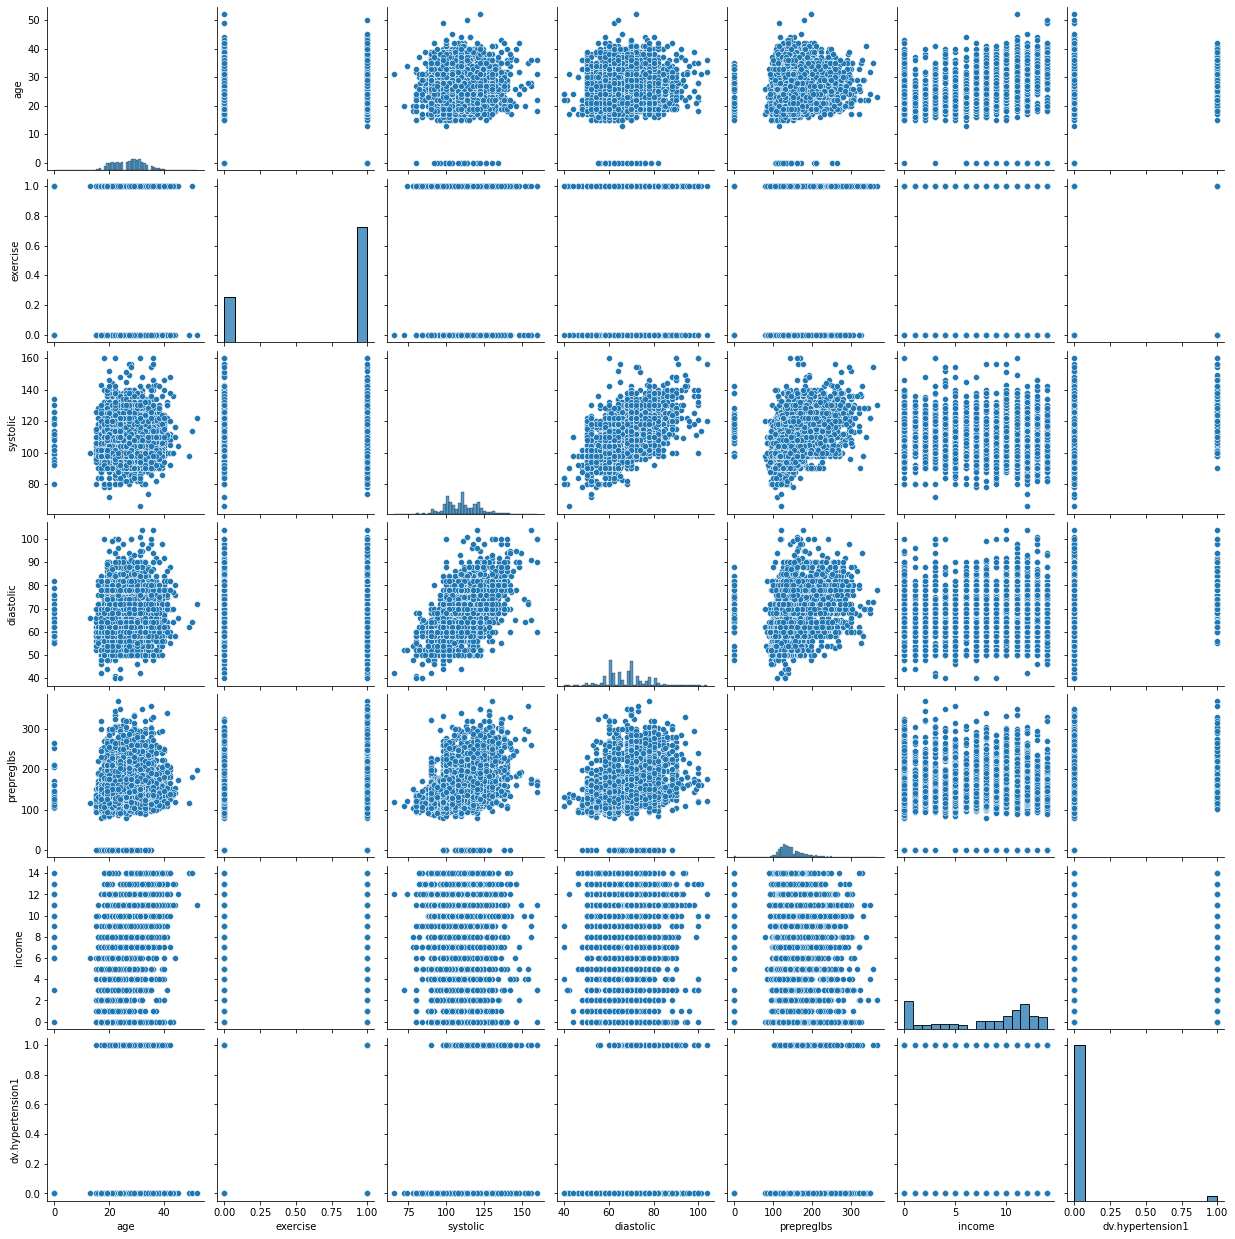

In [58]:
sns.pairplot(df[["age", "race", "exercise", "systolic", "diastolic", "prepreglbs", "income", "dv.hypertension1"]])

<AxesSubplot:>

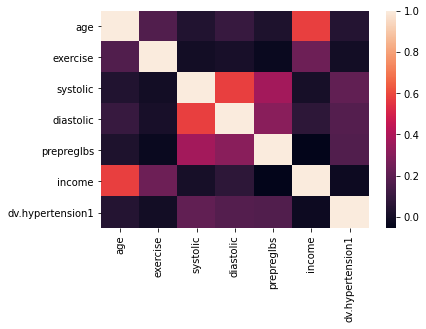

In [60]:
train = df[["age", "race", "exercise", "systolic", "diastolic", "prepreglbs", "income", "dv.hypertension1"]]
sns.heatmap(train.corr())

In [72]:
test = pd.get_dummies(
    test_df[
        ["age", "race", "exercise", "systolic", "diastolic", "prepreglbs", "income", "dv.hypertension1"]
    ]
)

In [153]:
test

,age,exercise,systolic,diastolic,prepreglbs,income,dv.hypertension1,race_black,race_hispanic,race_native,race_other,race_white
624,33,True,122,82,210.0,13,False,0,0,0,1,0
7270,35,True,98,58,109.0,11,False,0,0,0,0,1
7595,26,True,82,55,127.0,10,False,0,0,0,1,0
3396,21,False,98,72,132.0,0,False,1,0,0,0,0
5008,23,True,100,62,154.0,11,False,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
2563,27,True,120,81,143.0,12,False,0,0,0,0,1
3815,31,True,120,70,153.0,9,False,0,0,0,0,1
3153,19,False,120,66,145.0,0,False,0,0,0,0,1
1876,26,False,104,62,102.0,7,False,1,0,0,0,0


In [ ]:
train = pd.get_dummies(train)

In [154]:
train.columns

Index(['age', 'exercise', 'systolic', 'diastolic', 'prepreglbs', 'income',
       'dv.hypertension1', 'race_black', 'race_hispanic', 'race_native',
       'race_other', 'race_white'],
      dtype='object')

In [97]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(max_depth=3, n_estimators=100)
rf.fit(train.drop("dv.hypertension1", axis="columns"), train["dv.hypertension1"])

RandomForestClassifier(max_depth=3)

In [98]:
rf.score(test.drop("dv.hypertension1", axis="columns"), test["dv.hypertension1"])

0.9701680672268908

In [99]:
rf2 = RandomForestClassifier(max_depth=3, n_estimators=100)
rf2.fit(train.drop("dv.hypertension1", axis="columns"), train["dv.hypertension1"])
rf2.score(test.drop("dv.hypertension1", axis="columns"), test["dv.hypertension1"])

0.9701680672268908

In [101]:
pd.Series(rf2.predict(test.drop("dv.hypertension1", axis="columns"))).value_counts()

False    2380
dtype: int64

In [103]:
test["dv.hypertension1"].value_counts(normalize=True)

False    0.970168
True     0.029832
Name: dv.hypertension1, dtype: float64

In [91]:
from sklearn.tree import export_graphviz
import pydot
tree = rf.estimators_[5]

export_graphviz(
    tree, 
    out_file = 'tree.dot',
    feature_names = ['age', 'exercise', 'systolic', 'diastolic', 'prepreglbs', 'income', 'race_black', 'race_hispanic', 'race_native',
       'race_other', 'race_white'], 
    rounded = True, 
    precision = 1
)
# Use dot file to create a graph
(graph, ) = pydot.graph_from_dot_file('tree.dot')
# Write graph to a png file
graph.write_png('tree.png')

<AxesSubplot:>

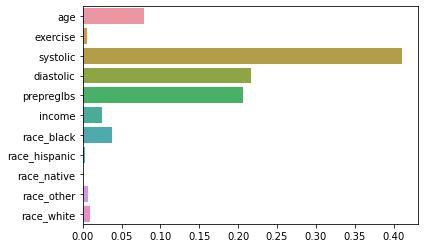

In [96]:
sns.barplot(x = rf.feature_importances_, y = ['age', 'exercise', 'systolic', 'diastolic', 'prepreglbs', 'income', 'race_black', 'race_hispanic', 'race_native',
       'race_other', 'race_white'])

In [94]:
help(rf)

Help on RandomForestClassifier in module sklearn.ensemble._forest object:

class RandomForestClassifier(ForestClassifier)
 |  RandomForestClassifier(n_estimators=100, *, criterion='gini', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='auto', max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, bootstrap=True, oob_score=False, n_jobs=None, random_state=None, verbose=0, warm_start=False, class_weight=None, ccp_alpha=0.0, max_samples=None)
 |  
 |  A random forest classifier.
 |  
 |  A random forest is a meta estimator that fits a number of decision tree
 |  classifiers on various sub-samples of the dataset and uses averaging to
 |  improve the predictive accuracy and control over-fitting.
 |  The sub-sample size is controlled with the `max_samples` parameter if
 |  `bootstrap=True` (default), otherwise the whole dataset is used to build
 |  each tree.
 |  
 |  Read more in the :ref:`User Guide <forest>`.
 |  
 |  

In [104]:
from sklearn.metrics import confusion_matrix

In [105]:
confusion_matrix(rf2.predict(test.drop("dv.hypertension1", axis="columns")), test["dv.hypertension1"])

array([[2309,   71],
       [   0,    0]])

In [118]:
pred = list(map(lambda x: False if x[0] > 0.9 else True, (rf2.predict_proba(test.drop("dv.hypertension1", axis="columns")))))

In [116]:
(rf2.predict(test.drop("dv.hypertension1", axis="columns")))

array([False, False, False, ..., False, False, False])

In [114]:
test[test["dv.hypertension1"] == True]

,age,exercise,systolic,diastolic,prepreglbs,income,dv.hypertension1,race_black,race_hispanic,race_native,race_other,race_white
7617,19,True,112,68,190.00000,5,True,0,1,0,0,0
507,21,False,100,70,125.00000,0,True,0,1,0,0,0
5742,33,True,133,91,127.86796,9,True,0,1,0,0,0
7434,27,True,118,72,209.00000,11,True,0,0,0,0,1
7402,27,True,120,80,108.00000,12,True,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3457,30,True,134,76,165.00000,14,True,0,0,0,0,1
6986,22,True,100,60,132.00000,1,True,0,0,0,0,1
2432,26,False,122,78,144.00000,10,True,0,0,0,0,1
5577,29,True,122,70,167.00000,11,True,0,0,0,1,0


In [119]:
pd.Series(pred).value_counts()

False    2307
True       73
dtype: int64

In [120]:
test["dv.hypertension1"].value_counts()

False    2309
True       71
Name: dv.hypertension1, dtype: int64

In [122]:
pd.Series(pred, name="dv.hypertension1") == test["dv.hypertension1"]

ValueError: Can only compare identically-labeled Series objects

In [123]:
pd.Series(pred, name="dv.hypertension1")

0       False
1       False
2       False
3       False
4       False
        ...  
2375    False
2376    False
2377    False
2378    False
2379    False
Name: dv.hypertension1, Length: 2380, dtype: bool

In [124]:
test["dv.hypertension1"]

624     False
7270    False
7595    False
3396    False
5008    False
        ...  
2563    False
3815    False
3153    False
1876    False
6915    False
Name: dv.hypertension1, Length: 2380, dtype: bool

In [127]:
confusion_matrix(test["dv.hypertension1"], pred)

array([[2252,   57],
       [  55,   16]])

In [128]:
tn, fp, fn, tp = confusion_matrix(test["dv.hypertension1"], pred).ravel()

In [129]:
tn, fp, fn, tp

(2252, 57, 55, 16)

In [131]:
help(rf.predict)

Help on method predict in module sklearn.ensemble._forest:

predict(X) method of sklearn.ensemble._forest.RandomForestClassifier instance
    Predict class for X.
    
    The predicted class of an input sample is a vote by the trees in
    the forest, weighted by their probability estimates. That is,
    the predicted class is the one with highest mean probability
    estimate across the trees.
    
    Parameters
    ----------
    X : {array-like, sparse matrix} of shape (n_samples, n_features)
        The input samples. Internally, its dtype will be converted to
        ``dtype=np.float32``. If a sparse matrix is provided, it will be
        converted into a sparse ``csr_matrix``.
    
    Returns
    -------
    y : ndarray of shape (n_samples,) or (n_samples, n_outputs)
        The predicted classes.



In [164]:
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score

In [136]:
f1_score(test["dv.hypertension1"], pred)

0.2222222222222222

In [137]:
f1_score(test["dv.hypertension1"], rf2.predict(test.drop("dv.hypertension1", axis="columns")))

0.0

In [156]:
test

,age,exercise,systolic,diastolic,prepreglbs,income,dv.hypertension1,race_black,race_hispanic,race_native,race_other,race_white
624,33,True,122,82,210.0,13,False,0,0,0,1,0
7270,35,True,98,58,109.0,11,False,0,0,0,0,1
7595,26,True,82,55,127.0,10,False,0,0,0,1,0
3396,21,False,98,72,132.0,0,False,1,0,0,0,0
5008,23,True,100,62,154.0,11,False,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
2563,27,True,120,81,143.0,12,False,0,0,0,0,1
3815,31,True,120,70,153.0,9,False,0,0,0,0,1
3153,19,False,120,66,145.0,0,False,0,0,0,0,1
1876,26,False,104,62,102.0,7,False,1,0,0,0,0


In [162]:
precision_score(test["dv.hypertension1"], rf2.predict(test.drop("dv.hypertension1", axis="columns")))

/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.0

In [163]:
recall_score(test["dv.hypertension1"], rf2.predict(test.drop("dv.hypertension1", axis="columns")))

0.0

In [166]:
accuracy_score(test["dv.hypertension1"], pred)

0.9529411764705882